## Assignment2.Exercise4: NonLinear Logistic regression

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
data = np.loadtxt('microchips.csv' ,delimiter=',')

## Exe4.Question1: Plot the data

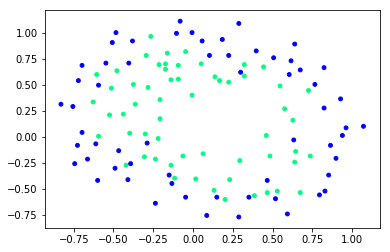

In [3]:
plt.scatter(data[:, 0], data[:, 1], c=data[:, 2],cmap='winter',  s=15)
plt.show()

## Exe4.Question2: Use Gradient descent to find beta and Plot

In [6]:
def mapFeature(X1,X2,D):
    one = np.ones((X1.shape[0],1))
    Xe = np.c_[one,X1,X2] 
    for i in range(2,D+1):
        for j in range(0,i+1):
            Xnew = X1**(i-j)*X2**j 
            Xnew = Xnew.reshape(-1,1) 
            Xe = np.append(Xe,Xnew,1) 
    return Xe

In [7]:
Xe=mapFeature(data[:, 0],data[:, 1],2)
y = data[:, 2]

In [8]:
def logistic(x):
    return np.exp(x)/(1 + np.exp(x))

def CostFunc(theta, X, y):
  
    J = - (1 / X.shape[0]) * (np.log(logistic(X @ theta)).T @ y + np.log(1 - logistic(X @ theta)).T @ (1 - y))  
    return J

def predict_(X,theta):
    y_pred = logistic(X @ theta)
    labels = y_pred >= 0.5
    
    labels = labels.astype(int)      
    return labels


def gradient_descent(X, y, theta,N, rate):
    costList = []
    for i in range(N):
        prediction = logistic(X@ theta)
        error = prediction - y
        costList.append(CostFunc(theta,X,y))
        theta = theta - (rate * (X.T @ error))

    return theta,costList

In [9]:
init_theta = np.zeros(Xe.shape[1])
niter=1000000
rate = 0.0001

print('α ={} , niter = {}'.format(rate,niter))

α =0.0001 , niter = 1000000


In [10]:
theta,costList = gradient_descent(Xe, y, theta=init_theta, N=niter, rate=rate)

In [11]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

h = .02  # step size in the mesh

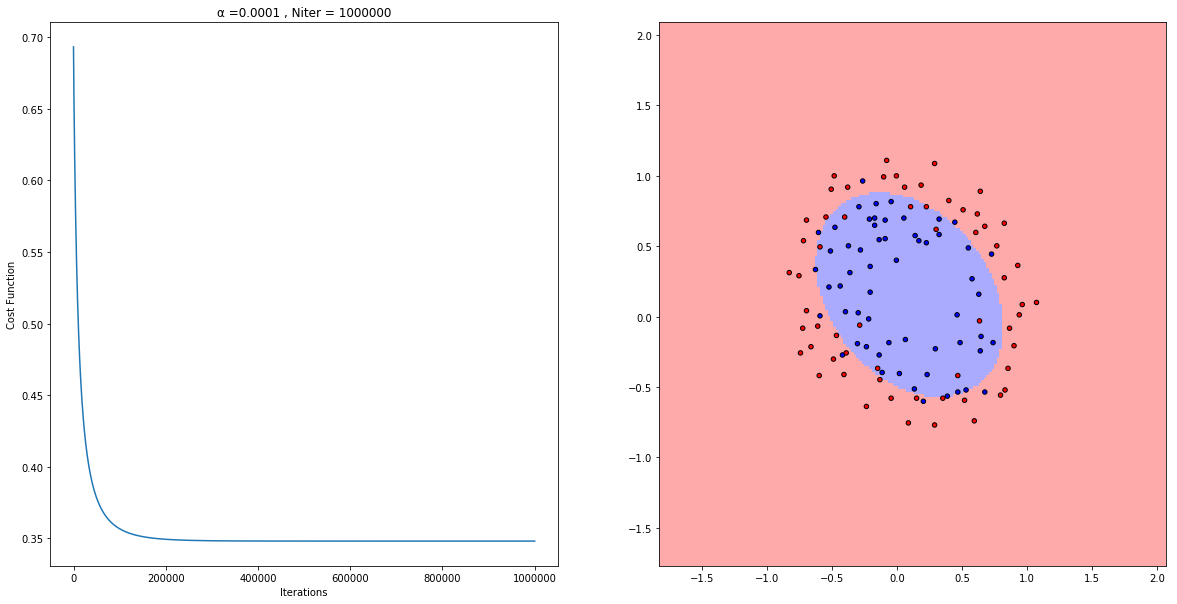

In [12]:
plt.figure(figsize=(20, 10))

plt.subplot(1,2, 1)

plt.plot(range(1, len(costList) + 1), costList)
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('α ={} , Niter = {}'.format(rate,niter))

#---------------------------------------------------------------

x_min, x_max = Xe[:, 1].min() - 1, Xe[:, 1].max() + 1
y_min, y_max = Xe[:, 2].min() - 1, Xe[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
mCoordinates=np.c_[xx.ravel(), yy.ravel()]
mc = mapFeature(mCoordinates[:,0],mCoordinates[:,1],2)
Z = predict_(mc,theta)
Z = Z.reshape(xx.shape)

plt.subplot(1,2, 2)

plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(Xe[:, 1], Xe[:, 2], c=y, cmap=cmap_bold,edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

## Exe4.Question3: Using LogisticRegression from Scikit Learn

In [13]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs',C=100.0,tol=1e-6,max_iter=1000)

In [14]:
logreg.fit(Xe,y)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=1e-06, verbose=0, warm_start=False)

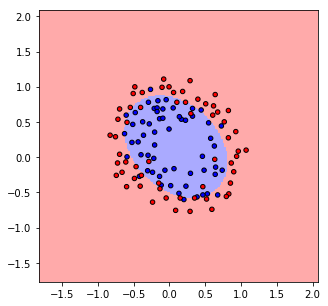

In [127]:
plt.figure(figsize=(5, 5))

x_min, x_max = Xe[:, 1].min() - 1, Xe[:, 1].max() + 1
y_min, y_max = Xe[:, 2].min() - 1, Xe[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
mCoordinates=np.c_[xx.ravel(), yy.ravel()]
mc = mapFeature(mCoordinates[:,0],mCoordinates[:,1],2)
Z = logreg.predict(mc)
Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(Xe[:, 1], Xe[:, 2], c=y, cmap=cmap_bold,edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

## Exe4.Question4

I created and used mapFeatures function in Question3 and I will use it for Question5, as well.

## Exe4.Question5

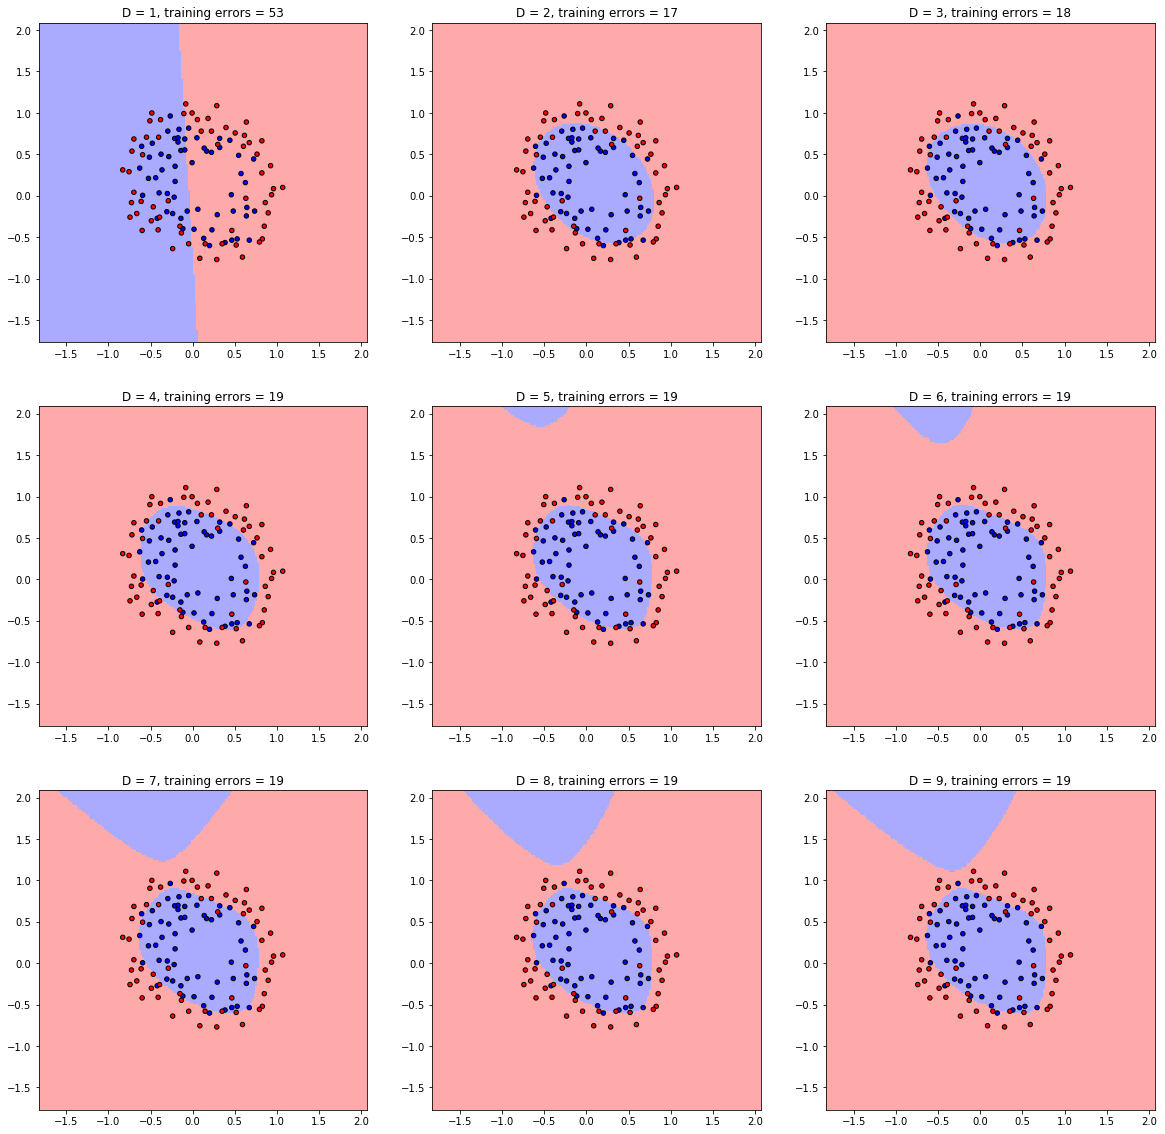

In [15]:
plt.figure(figsize=(20, 20))

for i in range(1,10):
    D = i
    Xe=mapFeature(data[:, 0],data[:, 1],D)
    logreg.fit(Xe,y)
    predictions = logreg.predict(Xe)
    
    error = ((predictions == y)== False).sum()
    
    x_min, x_max = Xe[:, 1].min() - 1, Xe[:, 1].max() + 1
    y_min, y_max = Xe[:, 2].min() - 1, Xe[:, 2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    mCoordinates=np.c_[xx.ravel(), yy.ravel()]
    mc = mapFeature(mCoordinates[:,0],mCoordinates[:,1],D)
    Z = logreg.predict(mc)
    Z = Z.reshape(xx.shape)
    
    plt.subplot(3,3, i)

    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(Xe[:, 1], Xe[:, 2], c=y, cmap=cmap_bold,edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("D = %i, training errors = %i" % (D, error))

plt.show()